# Академия Аналитиков Авито

# Эконометрика

Общий план курса:
- Повторение теории вероятности и математической статистики
- Классическая линейная регрессия
- **Множественная регрессия**
- Нарушение предпосылок теоремы Гаусса-Маркова
- Модели бинарного выбора
- Прогнозирование
- Временные ряды

# Занятие №3

- На предыдущем занятии мы

- Поговорили про классическую парную регрессию

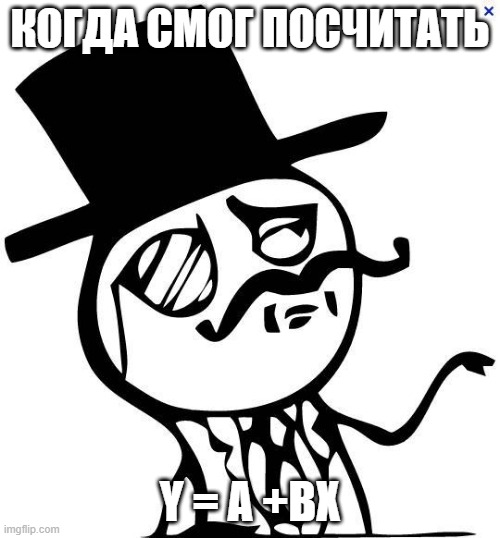

- Посмотрели на свойства статистических оценок

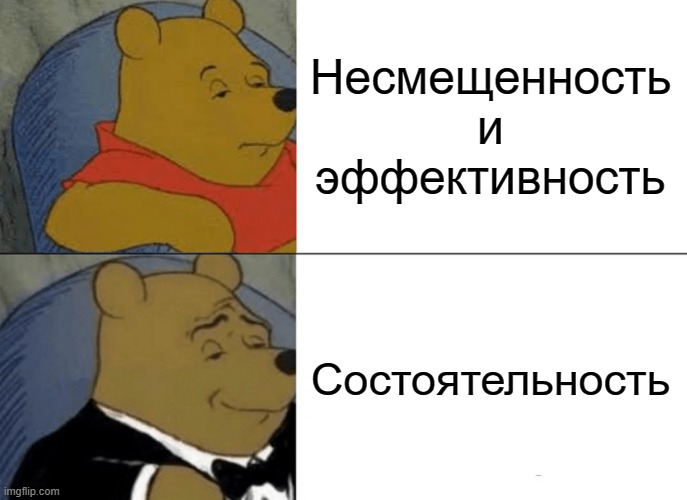

- Узнали про теорему Гаусса-Маркова  

# Тест

**Вопрос 1**
- Помните, на занятии было сказано, что оценка коэффициента - это на самом деле статистика, которая имеет некое распределение с параметрами
- От чего в модели будет зависеть, какое распределение будет иметь оценка коэффициентов?

**Вопрос 2**

- Я надеюсь, что вы помните ~наизусть конечно же~ формулы для оценок коэффициентов $\alpha, \beta$ в модели $Y = \alpha + \beta \cdot X + \varepsilon$
- Количество наблюдений равно 200, $n = 200$
- Также у нас следующие данные:
  - $\sum{X} = 11.34$
  - $\sum{Y} = 20.72$
  - $\sum{X^2} = 12.16$
  - $\sum{Y^2} = 84.96$
  - $\sum{XY} = 22.13$
- Посчитайте оценки коэффициентов $\alpha, \beta$

**Вопрос 3**
- Допустим, у нас есть такая модель $Y = \alpha + \varepsilon$
- Что будет является наилучшей, несмещенной оценка коэффициента $\alpha$
- А что если оценка коэффициента будет немного другой. Например, $\hat{\alpha} = \frac{1}{(n-2)} \cdot \sum{Y}$. Как вы думаете, какая проблема есть с этой оценкой?

**Вопрос 4**
- Есть в предпосылках теоремы Гаусса-Маркова предпосылка о нормальности распределения случайного члена?

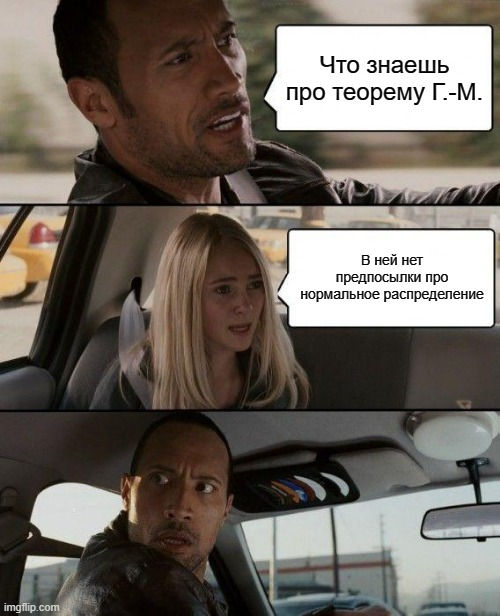

## Программа по заявкам

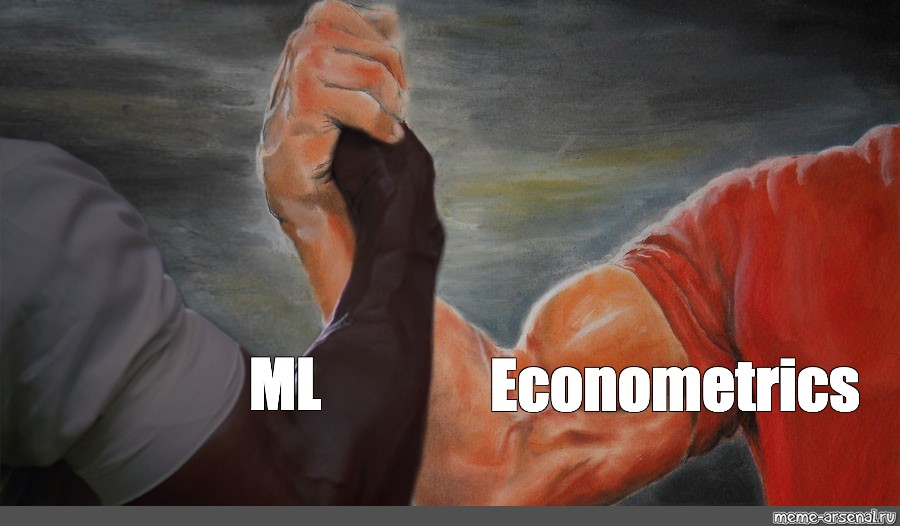

In [166]:
from IPython.display import Image
Image(filename="hands.jpeg")

## Повторение

In [167]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

- Вспомним, что было в прошлый раз
- Итак, у нас есть следующий датасет 
- Допустим, данные каким-то образом нормализованы/скалированы
- $\text{Salary}$ - это значение заработной платы менеджера, $\text{School_exam_results}$ - его балл ЕГЭ
- Нас с вами волнует вопрос, а, действительно, ли балл за ЕГЭ так сильно влияет на заработную плату

In [168]:
np.random.seed(123)
eps = np.random.normal(loc = 0, scale = 2, size = 10_000)
X1 = 0.5*eps + np.random.normal(loc = 0, scale = 4, size = 10_000)
X2 = -0.7*eps + np.random.normal(loc = 0, scale = 2, size = 10_000)
Y = 5 + 1.5*X1 - 10*X2 + eps
X = X1

In [169]:
data = pd.read_csv('class_03_revision.csv')

In [ ]:
X1 = data['School_exam_results']

In [ ]:
Y = data['Salary']
X = data['School_exam_results']

In [170]:
data = pd.concat([pd.Series(Y, name = 'Salary'), pd.Series(X1, name = 'School_exam_results')], axis = 1)
data.to_csv('class_03_revision.csv', index = False)

In [171]:
data

,Salary,School_exam_results
0,-42.076223,-6.049509
1,-6.063033,-0.254442
2,2.941565,-3.112809
3,-25.443817,8.005516
4,38.993590,2.051402
...,...,...
9995,17.418526,-4.386935
9996,-29.625495,-2.432376
9997,11.212811,-6.083626
9998,30.925254,4.760128


In [183]:
data.head()

,Salary,School_exam_results
0,-42.076223,-6.049509
1,-6.063033,-0.254442
2,2.941565,-3.112809
3,-25.443817,8.005516
4,38.993590,2.051402


In [184]:
data.describe()

,Salary,School_exam_results
count,10000.000000,10000.000000
mean,5.236831,0.051217
std,27.315257,4.138068
min,-97.591497,-14.546005
25%,-13.105475,-2.807399
50%,5.377525,0.045252
75%,23.516808,2.800884
max,110.040250,16.412637


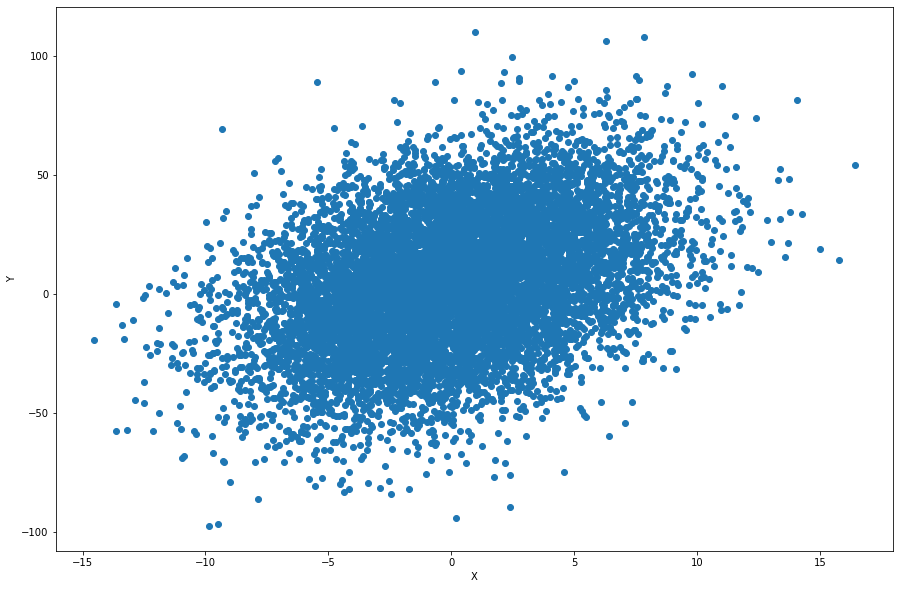

In [185]:
plt.figure(figsize=(15,10)) 
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [186]:
b = np.cov(X, Y)[0][1]/np.var(X, ddof=1)
a = np.mean(Y) - b * np.mean(X)
print('Константа равна {:.3f}, а коэффициент бета равен {:.3f}'.format(a, b))

Константа равна 5.105, а коэффициент бета равен 2.578


## План

- Множественная регрессия
- Проверка гипотез, относящихся к коэффициентам регрессии
- Качество оценивания

## Множественная регрессия

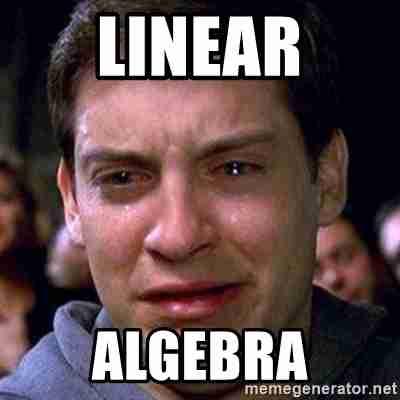

- Понятно, что модели с одной переменной, мягко говоря, не соответствуют реальным взаимосвязям.
- Хотелось бы обобщить их до моделей с множеством переменных
$$Y = X \beta + \varepsilon \\
\text{где} \\
X = \begin{bmatrix}
1 & X_{1, 1} & ... & X_{1, k-1} \\
. & . & ... & . \\
. & . & ... & . \\
. & . & ... & . \\
1 & X_{n, 1} & ... & X_{n, k-1} \\
\end{bmatrix}, Y = \begin{bmatrix}
Y_1 \\
. \\
. \\
. \\
Y_n \end{bmatrix}, \beta = \begin{bmatrix}
\beta_1 \\
... \\
\beta_k \end{bmatrix}, \varepsilon = \begin{bmatrix}
\varepsilon_1 \\
. \\
. \\
. \\
\varepsilon_n \end{bmatrix}$$

- Давайте вспомним, что мы вообще делали до этого
- Мы считали ошибку $Y_i - \hat{Y_i}$, потом возводили в квадрат $(Y_i - \hat{Y_i})^2$, а затем суммировали по всем наблюдениям $\sum_{i=1}^{n} (Y_i - \hat{Y_i})^2$ и минимизировали по оценкам коэффициент $\hat{\alpha}, \hat{\beta}$
- Если же мы переводим все в термины линейной алгебры, то:
    - У нас есть вектор ошибок $e = Y - \hat{Y} = Y - X\hat{\beta}$
    - Возвести в квадрат же выглядит так $e'e = (Y - X\hat{\beta})'(Y - X\hat{\beta})$
- Ну что же, наша задача минимизации теперь выглядит вот так:
$$(Y - X\hat{\beta})'(Y - X\hat{\beta}) \rightarrow \min_{\hat{\beta}}$$

- Для начала транспорнируем первую скобку
$$(Y' - \hat{\beta}'X')(Y - X \hat{\beta})$$
- Теперь раскроем скобки:
$$Y'Y - Y' X \hat{\beta} - \hat{\beta}'X'Y + \hat{\beta}'X'X\hat{\beta}$$
    - Заметим, что $Y' X \hat{\beta} = \hat{\beta}'X'Y$. Собственно, чтобы это заметить, для начала подметим, что $(Y' X \hat{\beta})' = \hat{\beta}'X'Y$, теперь посмотрим на размерность $[1 x n] [n x k] [k x 1] = [1 x 1]$, т.е. это просто константа. Помним, что $c' = c$, где $c$ - это константа
- Тогда получим:
$$Y'Y - 2\hat{\beta}'X'Y + \hat{\beta}'X'X\hat{\beta}$$
- Осталось минимзировать это выражение по вектору $\hat{\beta}$, т.е. взять производную
$$\frac{\partial e'e}{\partial \hat{\beta}} = -2X'Y + 2X'X\hat{\beta} = 0 \\
X'X\hat{\beta} = X'Y $$

$$\hat{\beta} = (X'X)^{-1}X'Y$$

- И давайте не забывать, что это случайные величины, которые имеют некую дисперсию и распределение
- С распределением все более менее понятно, какое распределение у случайной компоненты, такое и у оценок коэффициентов. Собственно, поэтому к предпосылкам теоремы Г.-М. и добавляют предпосылку о нормальности случайной компоненты, чтобы коэффициенты тоже были распределены нормально.
- А вот дисперсию выведем.  
- Для начала преобразуем формулу:  
$$\hat{\beta} = (X'X)^{-1}X'Y = \\
= (X'X)^{-1}X'(X\beta + \varepsilon) = \\
= (X'X)^{-1}X'X\beta + (X'X)^{-1}X'\varepsilon = \\
= \beta + (X'X)^{-1}X'\varepsilon$$  
- Как можем заметить, $\beta$ - это константа, а вот часть со случайным членом ~неожиданно~ случайна 
- Соответственно, для того чтобы вычислить дисперсию оценок коэффициентов регрессии надо посчитать:  
$$var(\beta + (X'X)^{-1}X'\varepsilon) = \\
= var((X'X)^{-1}X'\varepsilon) = \text{ помним, что } X \text{ детерминированы }\\ 
= (X'X)^{-1}X'var(\varepsilon)X(X'X)^{-1}$$  
- Более конкретную формулу получим, когда сделаем предпосылки относительно случайного члена

- Очевидно, что мы можем использовать эту формулу и для парной регресии
- Давайте посчитаем коэффициенты с помощью матриц

In [187]:
X.shape

(10000,)

In [188]:
Y.shape

(10000,)

In [189]:
# Помните бродкастинг с первого занятия?
# Давайте все же приведем наши вектора к "полной" размерности
X = X.reshape((X.shape[0], 1))
Y = Y.reshape((Y.shape[0], 1))

In [190]:
X.shape

(10000, 1)

In [191]:
Y.shape

(10000, 1)

In [192]:
X

array([[-6.04950929],
       [-0.25444169],
       [-3.11280867],
       ...,
       [-6.08362568],
       [ 4.76012782],
       [ 2.44773733]])

- Однако в матрице $X$ не хватает одной колонки с единицами. Давайте добавим ее

In [193]:
X = np.hstack((np.ones((X.shape[0], X.shape[1])), X))

In [194]:
X

array([[ 1.        , -6.04950929],
       [ 1.        , -0.25444169],
       [ 1.        , -3.11280867],
       ...,
       [ 1.        , -6.08362568],
       [ 1.        ,  4.76012782],
       [ 1.        ,  2.44773733]])

In [195]:
# Давайте по шагам
# Транспонируем X
X_transpose = X.T
X_transpose.shape

(2, 10000)

In [196]:
# Перемножим X'X
X_big = np.dot(X_transpose, X)
X_big.shape

(2, 2)

In [197]:
# Найдем обратную матрицу от X'X
X_invers = np.linalg.inv(X_big)

In [198]:
X_invers.shape

(2, 2)

In [199]:
# Умножим полученную обратную матрицу на X'
X_almost = np.dot(X_invers, X_transpose)

In [200]:
X_almost.shape

(2, 10000)

In [201]:
b_matrix = np.dot(X_almost, Y)
b_matrix

array([[5.10477013],
       [2.57846576]])

In [ ]:
a 

In [202]:
b_matrix[0][0] == a

False

In [203]:
b_matrix[1][0] == b

False

In [204]:
# а если немного подправим точность 
# обращение матриц - не самая точная операция
decimals = 13

In [205]:
np.around(b_matrix[0][0], decimals=decimals) == np.around(a, decimals=decimals)

True

In [206]:
np.around(b_matrix[1][0], decimals=decimals) == np.around(b, decimals=decimals)

True

- Матрицы это, конечно, супер круто, но не каждый же раз нам это все считать
- Рассмотрим такой замечательный пакет как [`statsmodels`](https://www.statsmodels.org/stable/index.html)
- Начну с "классического" синтаксиса для этого пакета

In [207]:
import statsmodels.api as sm

- OLS ordinary least squares (МНК, метод наименьших квадратов)

In [208]:
exog = sm.add_constant(X1)
model_classic = sm.OLS(endog=Y, exog=exog).fit()
model_classic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1800.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:15:59   Log-Likelihood:                -46436.
No. Observations:               10000   AIC:                         9.288e+04
Df Residuals:                    9998   BIC:                         9.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1048      0.251     20.299      0.000       4.612       5.598
x1             2.5785      0.061     42.429      0.000       2.459       2.698
==============================================================================
Omnibus:                        1.899   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.863
Skew:                          -0.030   Prob(JB):                        0.394
Kurtosis:                       3.028   Cond. No.                         4.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
model_classic.params

array([5.10477013, 2.57846576])

In [212]:
np.isclose(model_classic.params[0], a)

True

In [210]:
np.around(model_classic.params[1], decimals=decimals)==np.around(b, decimals=decimals)

True

In [211]:
np.around(model_classic.params[1], decimals=decimals)==np.around(b_matrix[1][0], decimals=decimals)

True

In [213]:
# R style
import statsmodels.formula.api as smf

In [214]:
X1

array([-6.04950929, -0.25444169, -3.11280867, ..., -6.08362568,
        4.76012782,  2.44773733])

In [215]:
X1 = np.reshape(X1, (X1.shape[0], 1))

In [216]:
df = pd.DataFrame(np.concatenate((Y, X1), axis = 1), columns=['Y', 'X'])

In [217]:
df

,Y,X
0,-42.076223,-6.049509
1,-6.063033,-0.254442
2,2.941565,-3.112809
3,-25.443817,8.005516
4,38.993590,2.051402
...,...,...
9995,17.418526,-4.386935
9996,-29.625495,-2.432376
9997,11.212811,-6.083626
9998,30.925254,4.760128


In [218]:
model = smf.ols('Y ~ X', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1800.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:20:49   Log-Likelihood:                -46436.
No. Observations:               10000   AIC:                         9.288e+04
Df Residuals:                    9998   BIC:                         9.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1048      0.251     20.299      0.000       4.612       5.598
X              2.5785      0.061     42.429      0.000       2.459       2.698
==============================================================================
Omnibus:                        1.899   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.863
Skew:                          -0.030   Prob(JB):                        0.394
Kurtosis:                       3.028   Cond. No.                         4.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Давайте с вами посмотрим на какой-нибудь пример
- Это данные по совокупным расходам на образование (EDUC), ВВП (GDP) и численности населения (POP) для 38 стран за 1997 г.
- Расходы на образование и ВВП даны в млн. долларах США, а численность в тыс. чел.

In [219]:
educ = pd.read_excel('class_03_practice_002.xls')

In [220]:
educ.head()

,country,EDUC,GDP,POP
0,Dominican R,122.7964,10350.00,7684
1,Oman,397.9194,12918.86,2116
2,Guatemala,194.2203,12983.20,10322
3,Slovakia,535.2473,13746.29,5325
4,Slovenia,719.8354,14385.53,1925


In [221]:
educ.describe()

,EDUC,GDP,POP
count,38.000000,38.000000,38.000000
mean,4499.227418,96944.433684,19726.605263
std,5530.543432,111202.981667,20663.405411
min,122.796400,10350.000000,1925.000000
25%,944.004125,31929.667500,5236.500000
50%,2246.503500,55539.930000,10771.500000
75%,4356.218750,114532.255000,25301.500000
max,21959.160000,483651.600000,89564.000000


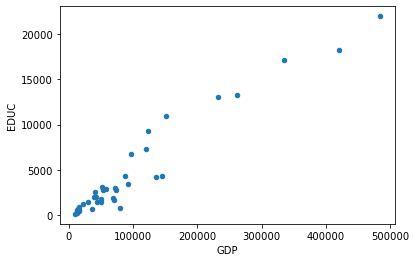

In [222]:
educ.plot.scatter(x = 'GDP', y = 'EDUC')
plt.show()

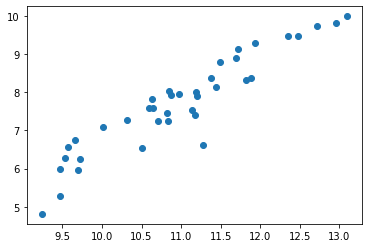

In [223]:
plt.scatter(np.log(educ['GDP']), np.log(educ['EDUC']))
plt.show()

In [224]:
model_educ = smf.ols('EDUC ~ GDP', data = educ).fit()
model_educ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   EDUC   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     509.8
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           7.61e-23
Time:                        21:04:17   Log-Likelihood:                -329.24
No. Observations:                  38   AIC:                             662.5
Df Residuals:                      36   BIC:                             665.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -160.4670    311.699     -0.515      0.610    -792.622     471.688
GDP            0.0481      0.002     22.579      0.000       0.044       0.052
==============================================================================
Omnibus:                        5.016   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                3.652
Skew:                           0.585   Prob(JB):                        0.161
Kurtosis:                       3.968   Cond. No.                     1.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

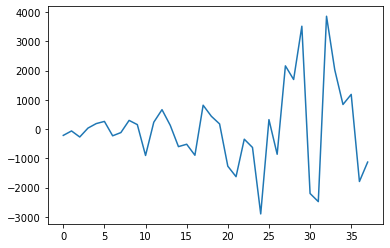

In [226]:
plt.plot(model_educ.resid)
plt.show()

In [ ]:
plt.hist(model_educ.resid)
plt.show()

In [225]:
sm.OLS(endog = np.log(educ['EDUC']), exog = sm.add_constant(np.log(educ['GDP']))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   EDUC   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     246.2
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.13e-17
Time:                        21:05:15   Log-Likelihood:                -23.346
No. Observations:                  38   AIC:                             50.69
Df Residuals:                      36   BIC:                             53.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0252      0.815     -6.164      0.000      -6.679      -3.372
GDP            1.1606      0.074     15.691      0.000       1.011       1.311
==============================================================================
Omnibus:                        9.635   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                8.600
Skew:                          -1.016   Prob(JB):                       0.0136
Kurtosis:                       4.142   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

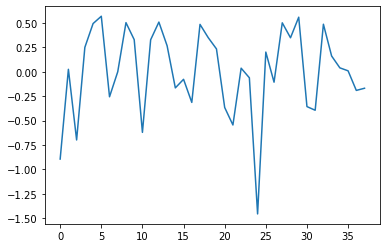

In [227]:
plt.plot(sm.OLS(endog = np.log(educ['EDUC']), exog = sm.add_constant(np.log(educ['GDP']))).fit().resid)
plt.show()

## Проверка гипотез, относящихся к коэффициентам регрессии

- Для начала давайте адаптируем предпосылки теорему Г.-М., которые мы с вами рассмотрели на прошлом занятии, к матричному виду
- Предпосылки теорему Г.-М. для случая множественной регресии:
    1. Модель линейна по параметра и верно специфицирована, т.е. может быть написана в таком виде: $Y = X\beta + \varepsilon$  
    2. $X$ - детерминированная матрица с полным рангом ($rank(X)=k$), т.е. $X$ линейно независимы
    3. $E[\varepsilon] = 0$
    4. $var(\varepsilon) = E[\varepsilon \varepsilon'] = \sigma^2 \cdot I_n$
    5. $E[\varepsilon_{i} \varepsilon_{j}] = 0  \forall  i \ne j$
- Наконец, нам все же понадобится предпосылки о нормальности случайного члена, что сказать следующее:
    - Во-первых, если перечисленные выше предпосылки выполняются, то 
        - Получаем несмещенность: $E(\hat{\beta}) = E(\beta + (X'X)^{-1}X'\varepsilon) = \beta + (X'X)^{-1}X'E(\varepsilon) = \beta$
        - Оценка дисперсии оценок (она эффективная, но показывать мы этого в рамках этого курса не будем): $var(\hat{\beta}) = (X'X)^{-1}X'var(\varepsilon)X(X'X)^{-1} = (X'X)^{-1}X'\sigma^{2}I_{n}X(X'X)^{-1} = \sigma^{2}(X'X)^{-1}X'X(X'X)^{-1} = \sigma^{2}(X'X)^{-1}$
    - Во-вторых, тогда $\hat{\beta} \sim N(\beta, \sigma^{2}(X'X)^{-1})$

- А вот теперь возникает интересный вопрос. А можем ли мы протестировать равенство коэффициента(-ов) какому-то числу?
- Ответ, конечно, да.
- Как обычно, вычитаем математическое ожидание, т.е. гипотетическое истинное значение коэффициента, и делим на квадратный корень из дисперсии. Собственно, получаем нормальное стандартное распределение.
$$z = \frac{\hat{\beta} - \beta}{\sqrt{\sigma^{2}(X'X)^{-1}}}$$
- Очевидно, что от того, какую гипотезу мы проверяем (например, что истинное значение коэффициент равно 0, и никакой вазимосвязи между переменными нет), зависит значение статистики.
- Однако, есть проблема. А именно, нам не известна дисперсия случайного члена $\sigma^2$. Мы можем заменить ее на несмещенную оценку дисперсии $s^{2}$.
    - Мы с вами уже видели пример несмещенной оценки дисперсии: $\frac{1}{N-1}\sum_{i=1}^{N}(x_{i} - \bar{x})^{2}$.
    - Однако, когда мы переходим к множественной регресии, несмещенная оценка дисперсии регресии равна: $s^2 = \frac{RSS}{N-K} = \frac{e'e}{N-K} = \frac{\sum_{i=1}^{N}e_{i}^{2}}{N-K}$
    - Нам также известно, что $(N-K) \frac{s^2}{\sigma^2} \sim \chi^{2}_{N-K}$ (очень подробно про это написано в учебнике "Магнус, Катышев, Пересецкий. Эконометрика")
- Теперь мы можем заменить неизвестную нам величину на известную и получить:
$$t_{к} = \frac{\hat{\beta} - \beta}{\sqrt{s^2(X'X)^{-1}}}$$  
- Давайте подумаем, как эта величина распределена:

- Числитель у нас распределен нормально с дисперсией $\sigma^2(X'X)^{-1}$, а про знаменатель мы знаем, что $(N-K) \frac{s^2}{\sigma^2} \sim \chi^{2}_{N-K}$
- Соответственно, если мы поделим числитель и знаменатель на $\sqrt{\sigma^2(X'X)^{-1}}$, то получим (надеюсь, понятно, что значение статистики не поменяется):
$$t_{к} = \frac{\hat{\beta} - \beta}{\sqrt{s^2(X'X)^{-1}}} = \\
= \frac{(\hat{\beta} - \beta)/\sqrt{\sigma^2(X'X)^{-1}}}{\sqrt{s^2(X'X)^{-1}/\sigma^2(X'X)^{-1}}} \sim \\
\sim \frac{N(0, 1)}{\sqrt{\chi^2_{N-K} / (N-K)}} = \\
= t_{N-K}$$

- Вопрос к вам.
- Я написал, что $\hat{\beta} \sim N(\beta, \sigma^2 (X'X)^{-1})$
- Но давайте внимательнее посмотрим на матрицу $\sigma^2 (X'X)^{-1}$
- Допустим у нас простой кейс: парная регрессия, т.е. $(X'X)^{-1}$ имеет размерность $[2x2]$ и она симметричая $\rightarrow$ для двух бет у нас будет некие 3 оценки
- Давайте вот на таком примере

In [228]:
X = np.array([[1, 3], [1, 5], [1, 6]])
np.linalg.inv(np.dot(X.T, X))

array([[ 5.        , -1.        ],
       [-1.        ,  0.21428571]])

- Собственно, сам вопрос
- Как вы считаете, какие элементы нам с вами нужны для того, чтобы посчитать дисперсию?

In [229]:
np.diag(np.linalg.inv(np.dot(X.T, X)))

array([5.        , 0.21428571])

- Фух, наконец-то мы можем тестировать гипотезу о равенстве коэффициента какому-то числу. 
- Давайте попробуем руками посчитать $t_{к}$ для датасета $(X, Y)$. У нас уже есть оценки коэффициентов, дисперсий оценок и т.п. из библиотеки `statsmodels`, но давайте разок посчитаем их руками.

In [230]:
np.random.seed(123)
eps = np.random.normal(loc = 0, scale = 1, size = 1000) 
X = np.random.normal(loc = 0, scale = 1, size = 1000)
Y = 2 + 5 * X + eps

In [ ]:
(pd.concat([pd.Series(np.ravel(X), name = 'X'), 
           pd.Series(np.ravel(Y), name = 'Y')], 
          axis = 1)).to_csv('class_03_practice_003.csv', index = False)

In [239]:
# Чтобы нам с вами было проще, давайте параллельно смотреть на выдачу из statsmodels
# Как обычно, я буду использовать R стиль
df = pd.read_csv('class_03_practice_003.csv')
model = smf.ols('Y ~ X', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 2.259e+04
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:20:44   Log-Likelihood:                -1419.2
No. Observations:                1000   AIC:                             2842.
Df Residuals:                     998   BIC:                             2852.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9607      0.032     61.920      0.000       1.899       2.023
X              4.9673      0.033    150.289      0.000       4.902       5.032
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.234
Skew:                          -0.033   Prob(JB):                        0.889
Kurtosis:                       2.963   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
ones = np.ones((Y.shape[0], 1))
X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)

In [232]:
X = np.hstack((ones, X))

In [233]:
inverse_X = np.linalg.inv(np.dot(X.T, X))

In [234]:
coef = np.dot(np.dot(inverse_X, X.T), Y)
coef

array([[1.96071003],
       [4.96731963]])

In [ ]:
np.round(float(coef[0]), 3) == np.round(float(model.params[0]), 3)

In [ ]:
np.round(float(coef[1]), 3) == np.round(float(model.params[1]), 3)

In [235]:
e = Y - np.dot(X, coef)
RSS = np.dot(e.T, e)
RSS

array([[1000.59549746]])

In [236]:
np.round(float(RSS), 3) == np.round(float(model.ssr), 3)

False

In [237]:
degrees_of_freedom = Y.shape[0] - X.shape[1]
degrees_of_freedom

998

In [240]:
degrees_of_freedom == model.df_resid

True

In [241]:
s = RSS / (degrees_of_freedom)
s

array([[1.0026007]])

In [242]:
np.round(float(s), 3) == np.round(float(model.scale), 3)

True

In [243]:
coef_se = np.sqrt(s*np.diag(inverse_X))
coef_se = coef_se.reshape((coef.shape[0], coef.shape[1]))
coef_se

array([[0.03166508],
       [0.03305173]])

In [244]:
np.round(float(coef_se[0]), 5) == np.round(float(model.bse[0]), 5)

True

In [245]:
np.round(float(coef_se[1]), 5) == np.round(float(model.bse[1]), 5)

True

In [246]:
t = coef/coef_se
t

array([[ 61.92025227],
       [150.28925968]])

In [247]:
np.round(float(t[0]), 5) == np.round(float(model.tvalues[0]), 5)

True

In [248]:
np.round(float(t[1]), 5) == np.round(float(model.tvalues[1]), 5)

True

In [249]:
pvalues = (1 - sp.stats.t.cdf(np.abs(t), df = degrees_of_freedom))*2

In [252]:
pvalues

array([[0.],
       [0.]])

In [250]:
float(pvalues[0]) == float(model.pvalues[0])

True

In [251]:
float(pvalues[1]) == float(model.pvalues[1])

True

- Тем не менее, я не рассказал еще про такую важную вещь, как проверка статистической значимости регрессии в целом.
- Об этом немного позже 

## Качество оценивания: коэффициент $R^2$

- Очень важный коэффициент для линейной регресии и понимания насколько хорошо оцененная линия регрессии соответствует наблюдениям.
- Для начала давайте представим рассматриваемую нами переменную $Y$ следующим образом:  
$$Y = \hat{Y} + e$$
- С другой стороны, у нас есть какая-то вариация в нашей переменной $Y$, которое выглядит как:  
$$\sum_{i=1}^{n} (Y_i - \bar{Y})^{2} \\ 
\text{ помним, что } \bar{e} = 0, \bar{\hat{Y}} = \bar{Y} \\
\sum_{i=1}^{n} (Y_i - \bar{Y})^{2} = \sum_{i=1}^{n} (\hat{Y_i} - \bar{Y})^{2} + \sum_{i=1}^{n} e_i^2 \\
TSS = ESS + RSS$$  
где $TSS$ - total sum of squares (общая сумма квадратов), $ESS$ - estimated sum of squares ("объясненная" сумма квадратов)
- Тогда, 
$$R^2 = \frac{\sum_{i=1}^{n} (\hat{Y_i} - \bar{Y})^{2}}{\sum_{i=1}^{n} (Y_i - \bar{Y})^{2}} = \frac{ESS}{TSS}$$  
- Таким образом, $R^2$ - показывает, какая доля вариации $Y$ объясняется регрессией
- При условии, что у нас в модели есть константа, иначе $\sum_{i=1}^{n}e_i \ne 0$, мы можем сказать, что:
    - $$R^2 = \frac{\sum_{i=1}^{n} (\hat{Y_i} - \bar{Y})^{2}}{\sum_{i=1}^{n} (Y_i - \bar{Y})^{2}} = 1 - \frac{\sum_{i=1}^{n} e_i^2}{\sum_{i=1}^{n} (Y_i - \bar{Y})^{2}} = 1 - \frac{RSS}{TSS}$$  
    - $$0 \leq R^2 \leq 1$$
- Стоит понимать, что $R^2$ - это не мера качества статистической модели, а мера качества линейной аппроксимации. Другими словами, вы можете использовать другой метод оценивания (не МНК) и получить более низкий $R^2$, но при этом другой метод вполне может давать намного лучшие статистические свойства.
    - В этом случае $R^2 = \text{corr}^2\{Y_i, \hat{Y_i} \} = \frac{(\sum_{i=1}^{n}(Y_i - \bar{Y})(\hat{Y_i} - \bar{\hat{Y_i}}))^2}{(\sum_{i=1}^{n}(Y_i - \bar{Y})^2)(\sum_{i=1}^{n}(\hat{Y_i} - \bar{\hat{Y_i}})^2)}$
- Второй, и очень важный недостаток, состоит в том, что он никогда не будет уменьшаться при увеличении числа регрессоров, даже если добавленные переменные не будут иметь никакой реальной объясняющей мощности.
    - Этот недостаток приводит к так называемому скорректированному ('adjusted') $R^2$, или $\bar{R}^2$:
    $$\bar{R}^2 = 1 - \frac{RSS/(N-K)}{TSS/(N-1)}$$  
- Третий недостаток/особенность заключается в том, что $R^2$ является чувствительным к определению зависимой переменной. 

- Давайте их посчитаем руками на том же датасете 

In [ ]:
TSS = np.dot((Y - np.mean(Y)).T, (Y - np.mean(Y)))
R_sqr = 1 - RSS/TSS
R_sqr

In [ ]:
float(R_sqr) == model.rsquared 

In [ ]:
R_sqr_adj = 1 - (RSS/degrees_of_freedom)/(TSS / (Y.shape[0] - 1))
R_sqr_adj

In [ ]:
float(R_sqr_adj) == model.rsquared_adj 

- Хм, как и у любой метрики, у $R^2$ есть свои недостатки, которые были написаны ранее
- Но все ли на этом заканчивается?
- Забавно, что очень часто забывают о том, что когда речь идет про in-sample (обучающая выборка), $R^2$ является просто напросто выборочной статистикой со своим распределением.
- Мы не будем выводить распределение (спойлер $R^2 \sim \text{Beta}(\frac{(k-1)}{2}, \frac{(n-k)}{2})$, где $k$ - количество регрессоров, включая константу, $n$ - количество наблюдений)
- Ну и тем, кому интересно, что такое [бета распределение](https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D1%82%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)
- И у такого распеделения есть математическое ожидание $E[R^2] = \frac{k-1}{n-1}$ и дисперсия $var(R^2) = \frac{2(k-1)(n-k)}{(n+1)(n-1)^{2}}$
- Собственно, к чему я

In [253]:
one_r = np.ones(shape = (100, 1))

big_R_array = []
for i in range(1000):
    X1_r = np.random.normal(loc = 0, scale = 1, size = 100).reshape((100, 1))
    X2_r = np.random.normal(loc = 0, scale = 1, size = 100).reshape((100, 1))
    X3_r = np.random.normal(loc = 0, scale = 1, size = 100).reshape((100, 1))
    Y_r = np.random.normal(loc = 0, scale = 1, size = 100).reshape((100, 1))

    X_big_r = np.hstack((one_r, X1_r, X2_r, X3_r))


    e_r = Y_r - np.dot(X_big_r, np.dot(np.dot(np.linalg.inv(np.dot(X_big_r.T, X_big_r)), X_big_r.T), Y_r))

    R_sqr_r = 1 - np.dot(e_r.T, e_r)/np.dot((Y_r - np.mean(Y_r)).T, (Y_r - np.mean(Y_r)))
    big_R_array.append(float(R_sqr_r))

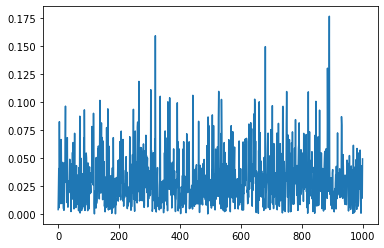

In [254]:
plt.plot(big_R_array)
plt.show()

In [255]:
one_r = np.ones(shape = (100, 1))

big_R_array = []
for i in range(1000):
    X1_r = np.random.normal(loc = 0, scale = 1, size = 100).reshape((100, 1))
    X2_r = np.random.normal(loc = 0, scale = 1, size = 100).reshape((100, 1))
    X3_r = np.random.normal(loc = 0, scale = 1, size = 100).reshape((100, 1))
    X4_r = np.random.normal(loc = 0, scale = 1, size = 100).reshape((100, 1))
    X5_r = np.random.normal(loc = 0, scale = 1, size = 100).reshape((100, 1))
    Y_r = np.random.normal(loc = 0, scale = 1, size = 100).reshape((100, 1))

    X_big_r = np.hstack((one_r, X1_r, X2_r, X3_r, X4_r, X5_r))


    e_r = Y_r - np.dot(X_big_r, np.dot(np.dot(np.linalg.inv(np.dot(X_big_r.T, X_big_r)), X_big_r.T), Y_r))

    R_sqr_r = 1 - np.dot(e_r.T, e_r)/np.dot((Y_r - np.mean(Y_r)).T, (Y_r - np.mean(Y_r)))
    big_R_array.append(float(R_sqr_r))

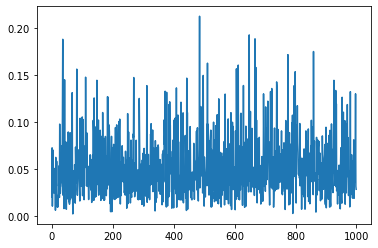

In [256]:
plt.plot(big_R_array)
plt.show()

- Ну, хорошо. Мы разобрались, что общая дисперсия зависимой переменной раскладывается на ту, которая "захватывает" модель и остаточную.
- Поняли, что есть некая мера качества "подгонки" модели как линейной аппроксимации.
- А можем ли мы как-то проверить, что модели в совокупности, является статистически значимой?
- Ответ: да, можем.

## Проверка гипотезы о значимости всех коэффициентов регрессии

- Собственно, гипотеза состоит в том, что все коэффициенты, кроме константы, равны 0, т.е. незначимы. $H_0: \beta_2 = ... = \beta_k = 0$
- Альтернативная же гипотеза в том, что хотя бы один из коэффициентов не равен нулю. $H_1: \exists \beta_j \ne 0 \forall j = \overline{2,...,k}$
- На самом деле эта и ранее рассмотренная гипотеза с $t$ критерием являются подмножеством того, что называется проверкой линейных ограничений. Мы с вами еще окунемся в это, когда будет проверять не все коэффициенты, а выборочно.
- Пока что нам с вами достаточно знать, что для проверки этой гипотезы нам нужен $F$ критерий, который выглядит вот так:
$$F = \frac{R^2 / (K-1)}{(1 - R^2) / (N-K)} = \frac{ESS/(K-1)}{RSS / (N-K)} \sim F_{K-1, N-K}$$

- Давайте посчитаем его

In [257]:
kminus1 = X.shape[1] - 1

In [258]:
kminus1 == model.df_model

True

In [259]:
F = (R_sqr / kminus1) / ((1 - R_sqr) / degrees_of_freedom)

In [260]:
np.round(float(F), 5) == np.round(float(model.fvalue), 5)

True

In [261]:
fpvalue = 1 - sp.stats.f.cdf(F, dfn = kminus1, dfd = degrees_of_freedom)

In [262]:
np.round(float(fpvalue), 10) == np.round(float(model.f_pvalue), 10)

True

- Хм, знаете, а интересно, как себя поведет эта статистика для случаев выше, когда у нас $R^2$ может быть чуть ли не 25%

In [263]:
fpvalue_array = []
kminus1_r = X_big_r.shape[1] - 1
df_r = Y_r.shape[0] - X_big_r.shape[1]
for r in big_R_array:
    F_new = (r / kminus1_r) / ((1 - r) / df_r)
    fpvalue_array.append(1 - sp.stats.f.cdf(F_new, dfn = kminus1_r, dfd = df_r))

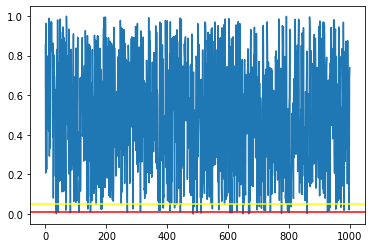

In [264]:
plt.plot(fpvalue_array)
plt.axhline(0.05, color = 'yellow')
plt.axhline(0.01, color = 'r')
plt.show()

In [ ]:
plt.plot(fpvalue_array)
plt.axhline(0.05, color = 'yellow')
plt.axhline(0.01, color = 'r')
plt.show()

- Ну, в целом, можем быть спокойными. $F$ критерий, действительно, почти всегда отлавливает случаи, когда регрессия статистически незначима, несмотря на относительно большой $R^2$ для подобных регрессий

## Другие метрики качества регрессии

- Пожалуй, стоит рассмотреть еще два популярных критерия для сравнения не вложенных моделей
- Первый - информационный критерий Акаике (AIC): $AIC = log\frac{1}{N}\sum_{i=1}^{N}e_i^{2} + \frac{2K}{N}$
- Второй - байесовский информационный критерий Шварца (BIC): $BIC = log\frac{1}{N}\sum_{i=1}^{N}e_i^{2} + \frac{K}{N}logN$
- Модели с более низкими значениями критерия AIC и BIC более предпочтительны. 
- Идея обоих критериев достаточно проста, пытаемся найти модель с наименьшим числом параметров и ошибки.
- Различие в том, что критерий BIC сильнее штрафует за количество параметров
- Честно говоря, в этих критериях заключено чуть больше смысла. Например, что критерий Акаике предполагает отсутствие настоящей модели и пытается найти лучшую аппроксимацию с помощью расстояния Кульбака — Лейблера. Но в рамках этого курса мы опустим эти моменты
- Статистические пакеты могут по-разному считать эти критерии. Например, стат. пакет `STATA` умножает их на количество наблюдений. Более того, на самом деле, чаще всего, эти критерии считаются по другой формуле: 
    - $AIC = 2K - 2logL$
    - $BIC = k\cdot logN - 2logL$
    - $L$ - значение функции правдоподобия 

## Регрессия

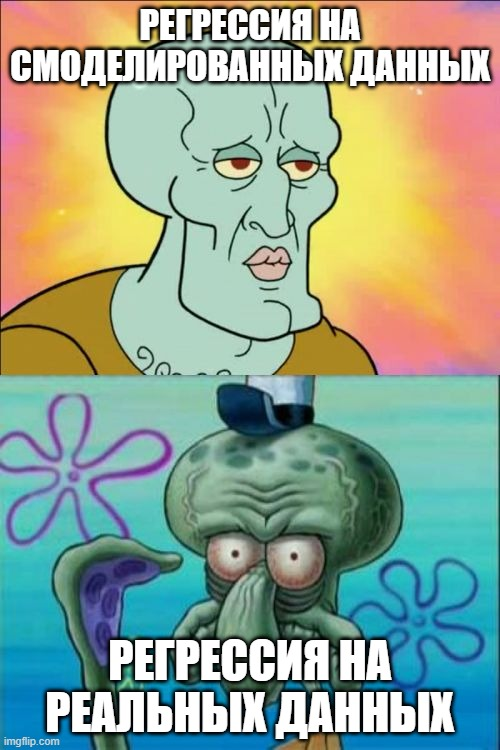

- У нас есть следующий датасет
- Нам хочется понять от чего зависит цена на машину
- Сам датасет составлен из стоимости автомобилей и их характеристик в 1978 г.
    - "make" - марка и модель автомобиля
    - "price" - цена
    - "mpg" - пробег
    - "rep78" - кол-во записей о ремонте к 1978 г.
    - "headroom" - габаритная высота
    - "trunk" - размер багажника
    - "weight" - вес
    - "length" - длина
    - "turn" - радиус разворота
    - "displacement" - объем двигателя
    - "gear_ratio" - передаточное число
    - "foreing" - происхождение автомобиля

In [172]:
df_matrix = pd.read_csv('class_03_practice_001.csv')

## QA (резюме занятия от вашего лица)

- Что мы сегодня с вами изучили?
- Как вы считаете, чем нам может помочь изученный материал? Где его можно применять?
- Что бы хотели добавить в это занятие или изменить в нем?